<a href="https://colab.research.google.com/github/Gigiasu/MAT-421/blob/main/MAT_421_HWB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17.4 Lagrange Polynomial Interpolation

Lagrange polynomial interpolation focuses on finding a single polynomial that goes through all the data points. The Lagrange polynomial, L(x), is such that L(x_i)=y_i for all points in the data set. 

The Lagrange polynomials is a linear combination of lagrange basis polinomials, P_i(x). P_i(x) has the properies that P_i(x)=1 when i=j and P_i(x_i)=0 when i=/j.

Below let us explore an example of the Lagrange polynomial interpolation with the data set x=[4,5,6] and y=[1,7,4]. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [2]:
x=[4,5,6]
y=[1,7,4]

x_new=np.arange(3.5,6.5,.1)
f=lagrange(x,y)

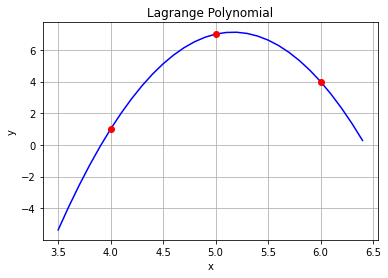

In [3]:
fig=plt.figure
plt.plot(x_new,f(x_new),'b',x,y,'ro') 
plt.title('Lagrange Polynomial') 
plt.grid() 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

Let us show a second example with Lagrange polynomial with the data set x=[1,2,3,4] and y=[4,2,9,1]

In [4]:
x=[1,2,3,4]
y=[4,2,9,1]

x_new=np.arange(0,9.5,.1)
f=lagrange(x,y)

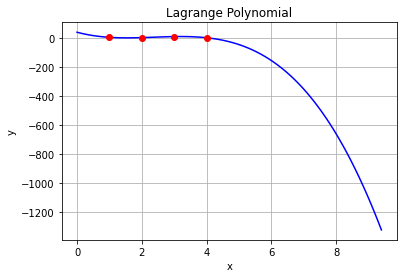

In [5]:
fig=plt.figure
plt.plot(x_new,f(x_new),'b',x,y,'ro') 
plt.title('Lagrange Polynomial') 
plt.grid() 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

17.5 Newton's Polynomial Interpolation

Newton's polynomial interpolation is another method for exactly fitting a set of data points. The general form of an n-1 order that goes through n points is f(x)=z0+a1(x-x0)+a2(x-x0)(x-x1)+...+an(x-x0)(x-x1)...(x-xn). Once coefficients are determined, if new data points are added, they will not affect the already calculated ones.

Let us explore an example of Newton's Polynomial Interpolation below 

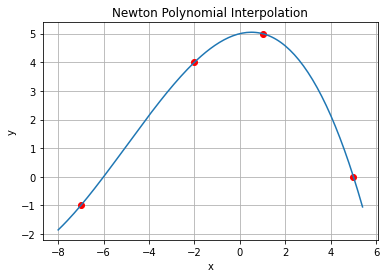

In [19]:
def divided_diff(x, y): 
    n = len(y) 
    coef = np.zeros([n, n])  
    coef[:,0] = y 
    for j in range(1,n): 
        for i in range(n-j): 
          coef[i][j] = \
          (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])         
    return coef 
 
def newton_poly(coef, x_data, x): 
    n = len(x_data) - 1  
    p = coef[n] 
    for k in range(1,n+1): 
        p = coef[n-k] + (x -x_data[n-k])*p 
    return p 
x = np.array([-7,-2,1,5]) 
y = np.array([-1,4,5,0]) 
a_s = divided_diff(x, y)[0, :] 
 
x_new = np.arange(-8, 5.5, .1) 
y_new = newton_poly(a_s, x, x_new) 
 
plt.figure 
plt.title('Newton Polynomial Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'ro') 
plt.plot(x_new, y_new) 